In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data=pd.read_csv('D:\\Data Science\\Projects\\Diabetes\\PIMA.csv')

In [3]:
data=raw_data.copy()

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.var().sort_values()

DiabetesPedigreeFunction        0.109779
Outcome                         0.227483
Pregnancies                    11.354056
BMI                            62.159984
Age                           138.303046
SkinThickness                 254.473245
BloodPressure                 374.647271
Glucose                      1022.248314
Insulin                     13281.180078
dtype: float64

In [8]:
# Here missing values are in the form of '0' except pregnancies 
for i in data.iloc[:,1:8]:
    data[i]=data[i].replace(to_replace = 0, value = data[i].mean())
 

In [9]:
data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [10]:
data['AgeBand'] = pd.cut(data['Age'], 3)
data[['AgeBand', 'Outcome']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Outcome
0,"(20.94, 41.0]",0.300336
1,"(41.0, 61.0]",0.564626
2,"(61.0, 81.0]",0.240000


In [11]:
data.loc[(data['Age'] > 20) & (data['Age'] <= 41), 'Age'] = 1
data.loc[(data['Age'] > 41) & (data['Age'] <= 61), 'Age'] = 2
data.loc[(data['Age'] > 61) & (data['Age'] <= 81), 'Age'] = 3

In [12]:
data=data.drop(['AgeBand'],axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,2,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,1,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,1,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,1,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1,1


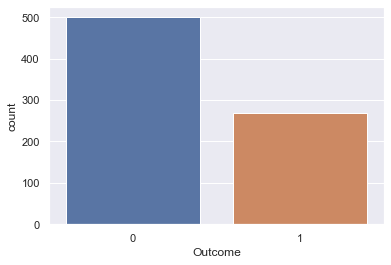

In [13]:
sns.countplot(data['Outcome'])

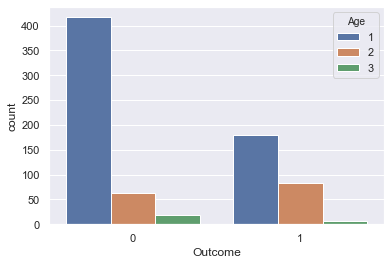

In [14]:
sns.countplot(x='Outcome',hue='Age',data=data)

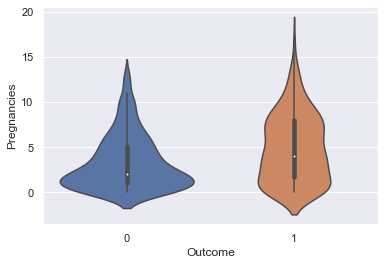

In [15]:
sns.violinplot(x='Outcome',y='Pregnancies',data=data)

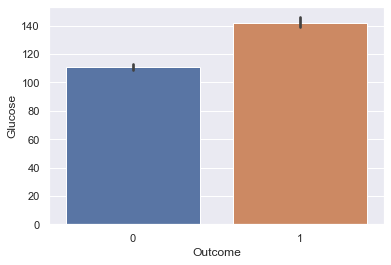

In [16]:
sns.barplot(x='Outcome',y='Glucose',data=data)

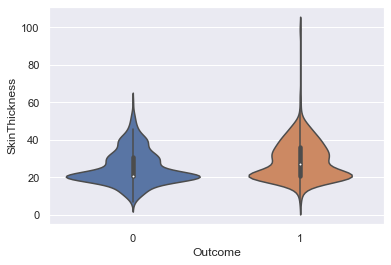

In [17]:
sns.violinplot(x='Outcome',y='SkinThickness',data=data)

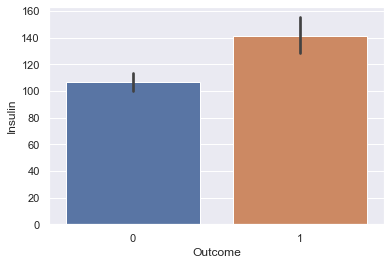

In [18]:
sns.barplot(x='Outcome',y='Insulin',data=data)

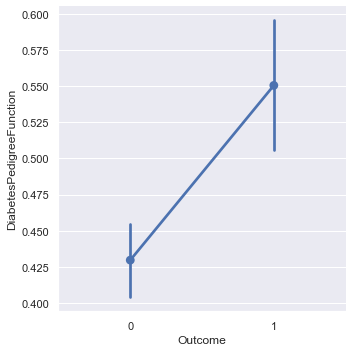

In [19]:
sns.factorplot(x='Outcome',y='DiabetesPedigreeFunction',data=data)

In [20]:
target=data['Outcome']
inputs=data.drop(['Outcome'],axis=1)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
X = scaler.transform(inputs)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=7)

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    #r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv)
    score = [r2_val_score.mean()]
    return score

In [24]:
from sklearn.tree import DecisionTreeClassifier
des = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
test_model(des)

[0.6736111111111112]

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
test_model(knn)

[0.720486111111111]

In [26]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
test_model(rfc)

[0.7465277777777777]

In [27]:
ada=AdaBoostClassifier()
test_model(ada)

[0.7083333333333334]

In [28]:
clf7=GradientBoostingClassifier()
test_model(clf7)

[0.7378472222222223]

In [29]:
etc=ExtraTreesClassifier()
test_model(etc)

[0.7204861111111112]

In [30]:
bc=BaggingClassifier()
test_model(bc)

[0.7222222222222222]

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'n_estimators':[50,70,100,120]
         }
rand_search = RandomizedSearchCV(rfc, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_

C:\Users\Akii\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7447916666666666